In [142]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [173]:
df=pd.read_csv('E:\\DataScience\\Data\\perrin-freres-monthly-champagne.csv',names=['Month','Sales'],header = 0)

In [144]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   106 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [146]:
df.dropna(inplace=True)

In [147]:
df['Month'] = pd.to_datetime(df.Month)
df.set_index('Month',inplace=True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [149]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


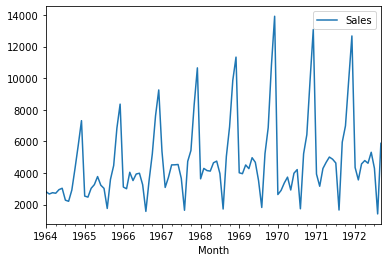

In [150]:
df.plot()

c:\users\sanu menon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


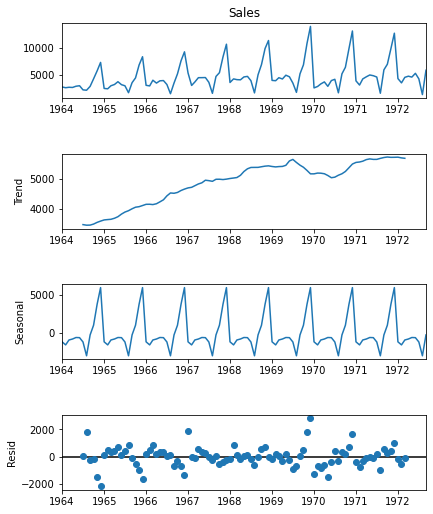

In [151]:
#time series components visualisation before stationarizing
decom = sm.tsa.seasonal_decompose(df.Sales, model='additive')
fig=decom.plot()
fig.set_figheight(8,10)
fig.show()

In [152]:
from statsmodels.tsa.stattools import adfuller

In [153]:
#NULL HYPO: Data is non-stationary
#ALT HYPO : Data is stationary

def adfuller_test(target):
    result= adfuller(target)
    labels=['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Reject Null Hypothesis.Data is stationary')
    else:
        print('Accept Null Hypothesis. Data is Non-stationary')

In [154]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276197
p-value : 0.3639157716602465
Lags Used : 11
Number of Observations Used : 93
Accept Null Hypothesis. Data is Non-stationary


In [155]:
#stationarizing data ---> Differencing
#can be done using:
#1. manual calculation (data minus shifted data) or 
#2. using diff()function or 
#3. using pmdarima package ndiff function.

In [156]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [157]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
Lags Used : 0
Number of Observations Used : 92
Reject Null Hypothesis.Data is stationary


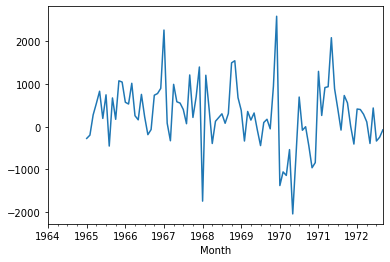

In [158]:
df['Seasonal First Difference'].plot()

In [159]:
#Autocorrelation and Partial Autocorrelation plots to find values of p,q
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

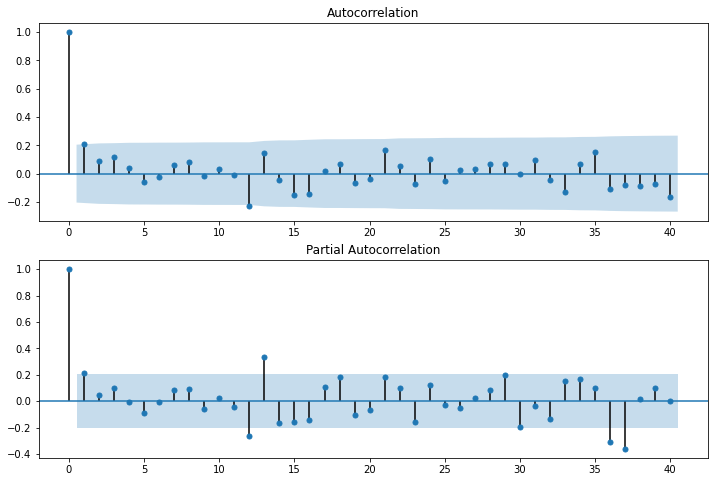

In [160]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [161]:
#p=1,q=1,d=1

In [162]:
from statsmodels.tsa.arima_model import ARIMA

In [163]:
model=ARIMA(df['Sales'],order=(1,1,1))
result=model.fit()

c:\users\sanu menon\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\sanu menon\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning

In [164]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Fri, 08 Jan 2021   AIC                           1910.251
Time:                        16:54:30   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7859     12.405      1.837      0.066      -1.528      47.100
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

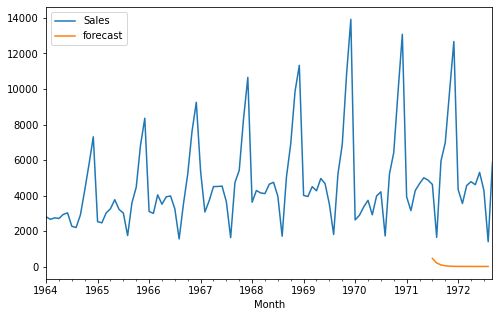

In [165]:
df['forecast']=result.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(8,5))

ARIMA doesnt give accurate results due to the seasonality component .So we use SARIMAX

In [166]:
smodel1=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(0, 1, 0,12))
results=smodel1.fit()

c:\users\sanu menon\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sanu menon\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


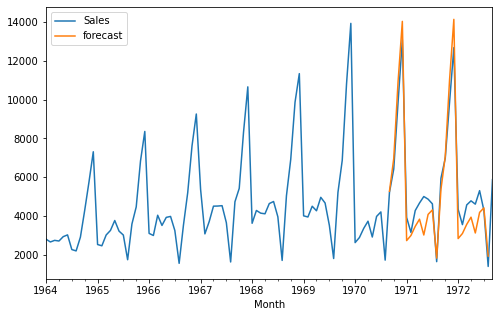

In [167]:
df['forecast']=results.predict(start=80,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(8,5))

In [168]:
#using auto arima to find the p,d,q parameters
from pmdarima.arima import auto_arima
train = df[:int(0.7*(len(df)))]
test = df[int(0.7*(len(df))):]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1334.796, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1336.519, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1332.803, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.717 seconds


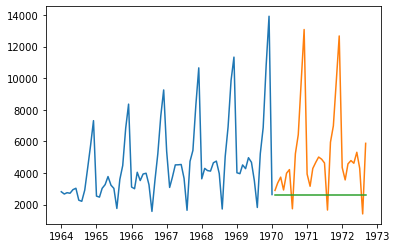

In [169]:
model = auto_arima(train['Sales'], trace=True, error_action='ignore', suppress_warnings=True,step_wise=True)
model.fit(train['Sales'])

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(forecast, label='Prediction',)
plt.show()

In [170]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   73
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -665.402
Date:                Fri, 08 Jan 2021   AIC                           1332.803
Time:                        16:54:32   BIC                           1335.080
Sample:                             0   HQIC                          1333.709
                                 - 73                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.148e+06   5.18e+05     11.860      0.000    5.13e+06    7.16e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               139.53
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               3.55   Skew:                            -1.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
smodel2=sm.tsa.statespace.SARIMAX(df['Sales'],order=(0, 1, 0),seasonal_order=(0, 1, 0,12))
results=smodel2.fit(train['Sales'])

c:\users\sanu menon\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sanu menon\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


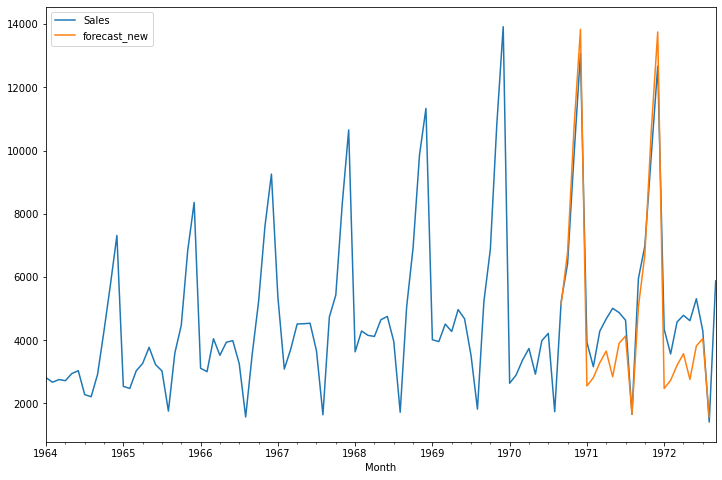

In [172]:
df['forecast_new']=results.predict(start=80,end=103,dynamic=True)
df[['Sales','forecast_new']].plot(figsize=(12,8))